In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Analysis Question

which gender is churning
how many senior citizens are churning
coorealtion bw InternetService and churn
tenure vs churn

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


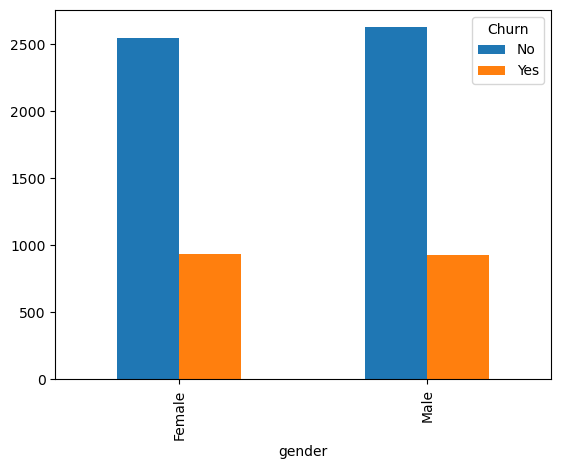

In [4]:
Sex_Churn = df.groupby(['gender', 'Churn']).size().reset_index().pivot(index = 'gender', columns = 'Churn', values = 0)
Sex_Churn.plot(kind = 'bar')
Sex_Churn

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


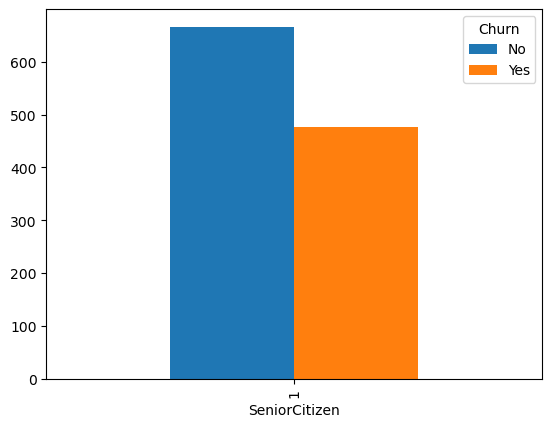

In [5]:
SeniorCitizen_Churn = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index().pivot(index = 'SeniorCitizen', columns = 'Churn', values = 0)
SeniorCitizen_Churn.loc[[1]].plot(kind = 'bar')
SeniorCitizen_Churn

In [6]:
print(df['InternetService'].unique())

['DSL' 'Fiber optic' 'No']


In [7]:
dft = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dft = dft [['InternetService', 'Churn', 'tenure']]
dft

,InternetService,Churn,tenure
0,DSL,No,1
1,DSL,No,34
2,DSL,Yes,2
3,DSL,No,45
4,Fiber optic,Yes,2
...,...,...,...
7038,DSL,No,24
7039,Fiber optic,No,72
7040,DSL,No,11
7041,Fiber optic,Yes,4


In [8]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [9]:
le_internet = LabelEncoder()
le_churn = LabelEncoder()

dft['InternetService'] = le_internet.fit_transform(dft['InternetService'])
dft['Churn'] = le_churn.fit_transform(dft['Churn'])

In [10]:
dft['InternetService']

0       0
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    0
7041    1
7042    1
Name: InternetService, Length: 7043, dtype: int32

In [11]:
dft['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [12]:
corr = dft['InternetService'].corr(dft['Churn'])
corr

-0.0472913876831424

In [13]:
core = dft['tenure'].corr(dft['Churn'])
core

-0.3522286701130779

In [14]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

<Axes: xlabel='tenure', ylabel='Count'>

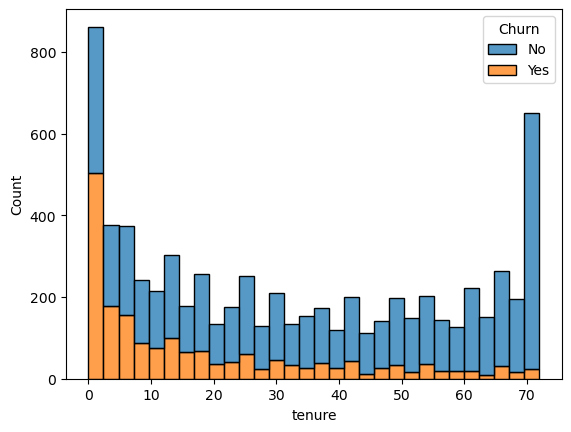

In [15]:
#SeniorCitizen_Churn = df.groupby(['tenure', 'Churn']).size().reset_index().pivot(index = 'tenure', columns = 'Churn', values = 0)
#SeniorCitizen_Churn.plot(kind = 'bar', stacked = True)
#SeniorCitizen_Churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)

<Axes: xlabel='Churn', ylabel='tenure'>

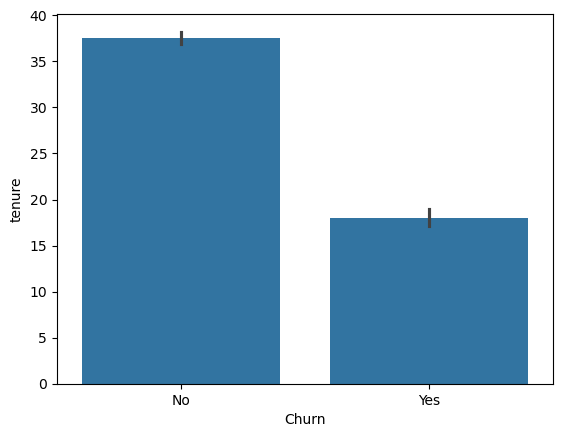

In [16]:
# average tenure of churned vs. non-churned customers
sns.barplot(x='Churn', y='tenure', data=df)

In [17]:
# Group by tenure and calculate churn rate
# tenure_churn = df.groupby('tenure')['Churn'].mean()

# # Plot
# plt.figure(figsize=(10,6))
# tenure_churn.plot(kind='line')
# plt.title('Churn Rate by Tenure')
# plt.xlabel('Tenure (months)')
# plt.ylabel('Churn Rate')
# plt.grid(True)
# plt.show()

In [18]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
target = df['Churn']

In [20]:
target = pd.DataFrame(data=df, columns=['Churn'])
target.sample(n=8, random_state=1)

,Churn
3381,No
6180,No
4829,No
3737,Yes
4249,No
6835,No
3869,No
3943,No


In [21]:
cat_col = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']

In [22]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [23]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [24]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
df.fillna(df['TotalCharges'].mean(), inplace = True)

In [26]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})

In [27]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})

In [29]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [30]:
def Object_to_integer(df):
    if df.dtype == 'object':
        df = LabelEncoder().fit_transform(df)
    return df

In [31]:
df = df.apply(Object_to_integer)

In [32]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [33]:
#x = Object_to_integer(df)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']

In [37]:
X_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,692,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,24.80
2715,325,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,996.45
3825,2527,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,1031.70
1807,4911,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,76.35
132,6058,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,1967,0,0,1,0,64,1,0,0,0,2,2,2,0,2,2,1,3,68.30,4378.80
315,3548,1,0,1,1,51,1,2,1,2,2,0,2,2,2,1,0,1,110.05,5686.40
2439,6282,1,0,1,1,17,1,0,2,1,1,1,1,1,1,1,0,0,19.90,329.75
5002,384,0,0,1,1,69,0,1,0,2,0,2,0,0,2,2,1,1,43.95,2960.10


In [38]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [39]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [40]:
X_test[num_cols].info()
X_test[num_cols].head()

<class 'pandas.core.frame.DataFrame'>
Index: 1409 entries, 185 to 1161
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          1409 non-null   float64
 1   MonthlyCharges  1409 non-null   float64
 2   TotalCharges    1409 non-null   float64
dtypes: float64(3)
memory usage: 44.0 KB


,tenure,MonthlyCharges,TotalCharges
185,-1.284605,-1.331629,-1.002388
2715,0.353238,-1.316672,-0.572634
3825,0.803645,-1.512772,-0.557043
1807,-1.284605,0.381756,-0.979588
132,1.417836,-0.475768,0.428565


In [41]:
X_train

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,2956,0,0,0,1,-0.465683,1,0,0,2,0,2,0,0,2,1,0,3,-0.000474,-0.422099
1623,4287,0,0,0,0,0.885537,1,2,1,0,2,0,0,2,2,2,1,0,1.074754,1.255366
6074,2674,1,0,1,0,-1.284605,0,1,0,0,0,0,0,0,0,0,1,2,-1.376499,-1.002985
1362,1756,1,0,0,0,-1.161766,1,0,1,0,0,0,0,0,0,0,1,2,0.177346,-0.908113
6754,1906,1,0,0,1,-1.325551,1,2,0,2,2,0,2,0,0,2,1,0,-0.098524,-0.003468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,468,1,0,1,0,-1.284605,1,0,1,2,0,0,0,2,2,0,1,2,1.001632,-0.971339
5191,4242,0,0,1,1,-0.383791,1,2,0,2,2,2,2,2,2,2,1,1,0.872006,-0.041063
5226,5711,1,0,1,1,-0.834198,1,0,2,1,1,1,1,1,1,0,1,2,-1.452945,-0.877993
5390,5281,1,1,0,0,-0.834198,1,2,1,0,0,2,0,2,2,0,1,2,1.149538,-0.482538


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
regression = LogisticRegression(max_iter=1000)
regression.fit(X_train, y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [44]:
accuracy = regression.score(X_test, y_test)

In [45]:
accuracy

0.8168914123491838

In [46]:
from sklearn.metrics import classification_report

log_pred = regression.predict(X_test)
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



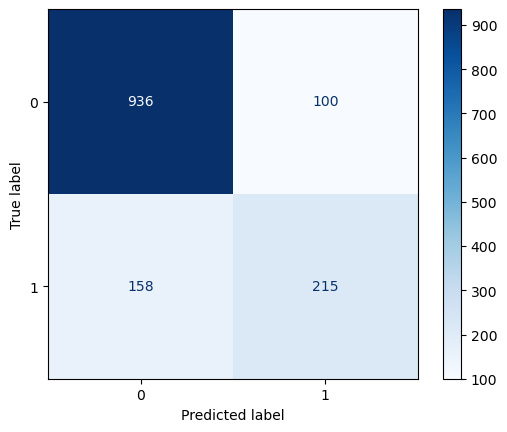

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, log_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regression.classes_)
disp.plot(cmap='Blues')

In [48]:
from sklearn.metrics import roc_curve, auc

In [49]:
# predict_proba(X_test) returns the predicted probabilities for each (churn or no churn) in a model, rather than just the final predicted label (0 or 1).
y_prob = regression.predict_proba(X_test)[:, 1]  # Probability for class 1 (Churn: Yes, gives 2nd column values)
y_prob

array([0.65353853, 0.06358799, 0.00507069, ..., 0.04134588, 0.0154978 ,
       0.5467875 ])

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

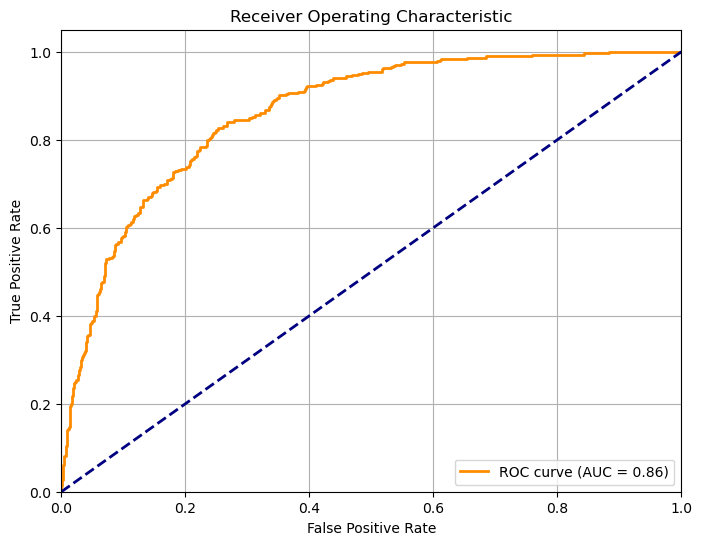

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## SVM: Support Vector Machine

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svcclassifier = SVC(kernel='linear', degree=5, probability=True)

In [53]:
svcclassifier.fit(X_train,y_train)

SVC(degree=5, kernel='linear', probability=True)

In [57]:
svm_pred = svcclassifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,svm_pred)) 

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



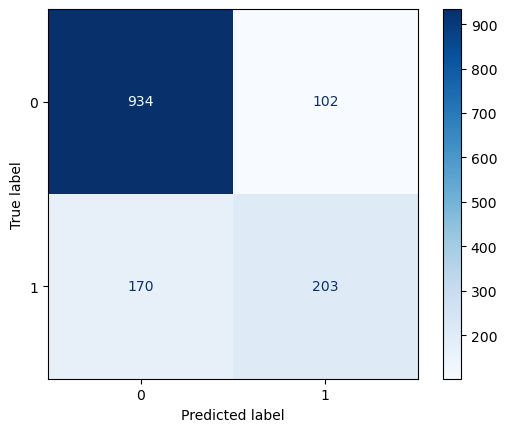

In [59]:
cm = confusion_matrix(y_test, svm_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=regression.classes_)
disp.plot(cmap='Blues')

In [60]:
svcclassifier.score(X_test, y_test)

0.8069552874378992

In [61]:
from sklearn.metrics import roc_curve, auc

In [62]:
y_prob = svcclassifier.predict_proba(X_test)[:,1]
y_prob

array([0.57469857, 0.01851234, 0.0014719 , ..., 0.00430084, 0.03117912,
       0.41720626])

In [63]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

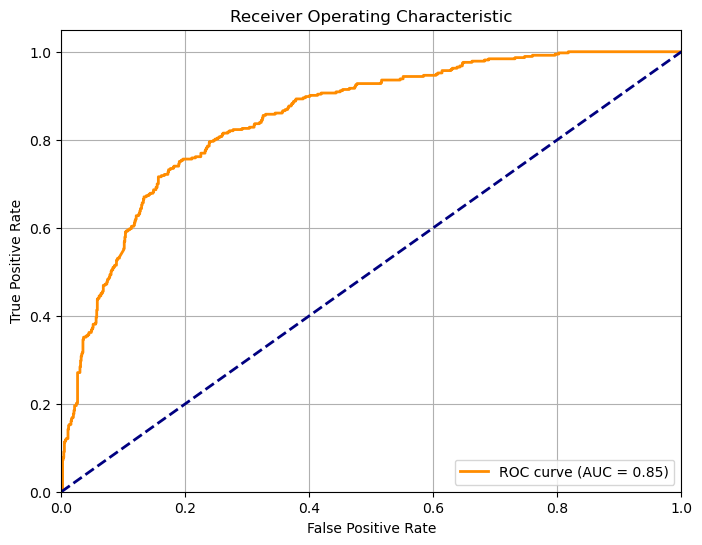

In [64]:
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [67]:
prediction_test = model_rf.predict(X_test)

In [68]:
model_rf.score(X_test, y_test)

0.7970191625266146

In [69]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.79      1409



In [70]:
from sklearn.metrics import roc_curve, auc

In [71]:
y_prob = model_rf.predict_proba(X_test)[:,1]
y_prob

array([0.78, 0.19, 0.  , ..., 0.  , 0.09, 0.48])

In [72]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

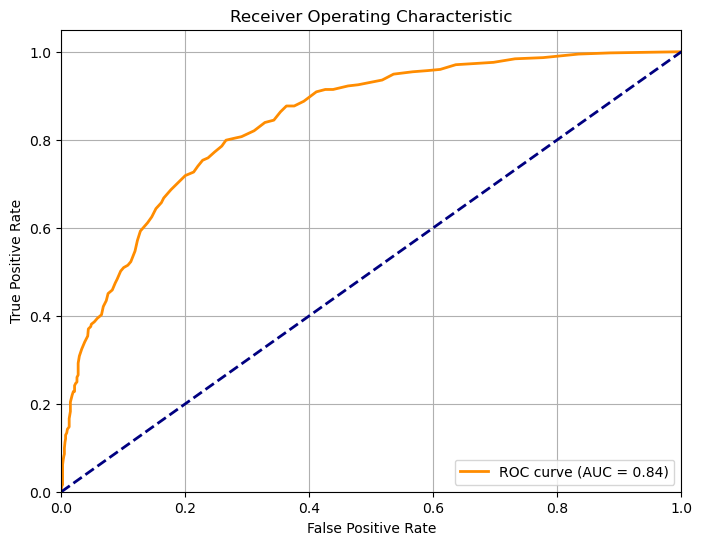

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(false_positive_rate, true_positive_rate, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [74]:
models = {

    "Logistic Regression": regression,
    "Random Forest": model_rf,
    "SVM": svcclassifier
}

In [75]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [76]:
# Cross validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
result ={}
for name, model in models.items():
    scores=cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    result[name]=scores
    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Logistic Regression: Mean Accuracy = 0.8039, Std = 0.0121
Random Forest: Mean Accuracy = 0.7965, Std = 0.0072
